In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

def process_and_plot(ax, file_paths, multipliers, shift_days=20, 
                     trace_color='grey', trace_alpha=0.5, 
                     line_color='b', line_alpha=0.5, subplot_title=""):
    """
    Reads two CSV files, applies the given multipliers to DVT,
    interpolates them onto a unified time axis, and then plots:
      1) The individual (grey) traces, each shifted in time by shift_days
      2) The weighted Δv/v curve (in blue).
    
    Plots are drawn onto the given Axes object (ax).
    """
    Tdates = ['2015-06-24 22:25:29.343674','2015-10-21 07:10:22.988772','2016-01-10 21:12:28.836671','2016-02-27 12:03:06.102124','2016-06-04 14:36:16.085195',
          '2016-06-04 14:37:36.094455','2016-08-05 16:32:06.889686','2016-08-14 00:35:30.246556','2016-08-14 14:38:36.101401','2016-08-20 22:07:09.216344',
          '2016-09-01 15:43:16.550527','2016-09-17 02:04:20.863526','2016-09-17 02:08:10.890149','2016-09-24 18:19:27.635143','2016-09-25 03:22:01.402940',
          '2016-09-25 03:24:51.422618','2016-10-02 12:07:35.052668','2016-11-18 05:22:02.236370','2017-07-29 04:03:41.692326','2017-09-06 10:28:44.366246',
          '2017-09-06 13:01:05.424239','2017-09-06 13:13:25.509897','2017-09-06 13:15:45.526103','2017-09-06 13:19:15.550411','2017-09-06 13:48:05.750666',
          '2017-09-06 13:55:55.805070','2017-09-06 13:58:15.821276','2017-09-06 14:06:35.879153','2017-09-06 14:10:55.909249','2017-09-06 14:31:06.049311',
          '2017-09-06 14:47:16.161593','2017-09-06 15:14:26.350272','2017-09-06 15:32:06.472971','2017-09-06 16:52:17.029749','2017-09-06 17:02:57.103831',
          '2017-09-06 17:04:37.115407','2017-09-06 17:06:47.130455','2017-09-06 17:37:27.343443','2018-01-03 15:22:06.403519','2018-02-10 14:43:16.133812',
          '2018-03-13 15:48:13.211856','2018-06-26 12:51:25.357102','2018-06-26 13:01:05.424239','2018-09-19 07:27:03.104526','2019-05-11 05:18:53.169843',
          '2019-07-11 03:20:01.777251','2019-07-11 03:32:31.888329','2019-07-11 03:46:02.008294','2020-05-08 09:41:54.040977','2020-07-09 09:30:43.963422']
    
    from datetime import datetime
    #Tdates= ['2015-06-24 22:25:29.343674','2015-10-21 07:10:22.988772','2016-01-10 21:12:28.836671','2016-02-27 12:03:06.102124','2016-06-04 14:36:16.085195','2016-06-04 14:37:36.094455','2016-08-05 16:32:06.889686','2016-08-14 00:35:30.246556','2016-08-14 14:38:36.101401','2016-08-20 22:07:09.216344','2016-09-01 15:43:16.550527','2016-09-17 02:04:20.863526','2016-09-17 02:08:10.890149','2016-09-24 18:19:27.635143','2016-09-25 03:22:01.402940','2016-09-25 03:24:51.422618','2016-10-02 12:07:35.052668','2016-11-18 05:22:02.236370','2017-07-29 04:03:41.692326','2017-09-06 10:28:44.366246','2017-09-06 13:01:05.424239','2017-09-06 13:13:25.509897','2017-09-06 13:15:45.526103','2017-09-06 13:19:15.550411','2017-09-06 13:48:05.750666','2017-09-06 13:55:55.805070','2017-09-06 13:58:15.821276','2017-09-06 14:06:35.879153','2017-09-06 14:10:55.909249','2017-09-06 14:31:06.049311','2017-09-06 14:47:16.161593','2017-09-06 15:14:26.350272','2017-09-06 15:32:06.472971','2017-09-06 16:52:17.029749','2017-09-06 17:02:57.103831','2017-09-06 17:04:37.115407','2017-09-06 17:06:47.130455','2017-09-06 17:37:27.343443','2018-01-03 15:22:06.403519','2018-02-10 14:43:16.133812','2018-03-13 15:48:13.211856','2018-06-26 12:51:25.357102','2018-06-26 13:01:05.424239','2018-09-19 07:27:03.104526','2019-05-11 05:18:53.169843','2019-07-11 03:20:01.777251','2019-07-11 03:32:31.888329','2019-07-11 03:46:02.008294','2020-05-08 09:41:54.040977','2020-07-09 09:30:43.963422']#,'2022-02-12 03:54:41.629818','2022-04-22 23:23:09.744183','2022-08-21 18:37:17.759000','2022-10-28 00:42:20.294016','2023-01-29 16:30:26.878111','2023-02-27 13:00:45.421924','2023-05-05 06:52:22.863757']
    datetime_objects = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in Tdates]

    dataframes = []
    for path, multiplier in zip(file_paths, multipliers):
        df = pd.read_csv(path)
        df['DVT'] *= multiplier
        df['T'] = pd.to_datetime(df['T'])
        df.set_index('T', inplace=True)
        dataframes.append(df)

    # Create a unified time index from the union of all timestamps
    unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

    # Interpolate data for each dataframe to match the unified index
    interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

    # Shift and plot the grey individual timeseries
    for df in interpolated_dfs:
        shifted_df = df.copy()
        shifted_df.index += pd.DateOffset(days=shift_days)
        ax.plot(shifted_df.index, shifted_df['DVT'], color=trace_color, alpha=trace_alpha)

    # Calculate CC_mean using squared correlation coefficients for each time point
    CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

    # Calculate weighted Δv/v
    weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

    # Build a DataFrame for plotting
    weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
    weighted_dvv_df.index += pd.DateOffset(days=shift_days)

    # Plot the weighted Δv/v line
    ax.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 
            color=line_color, alpha=line_alpha)
    
    for dt in datetime_objects:
        ax.axvline(x=dt, color='red', linestyle='--')

    # Set titles, labels, and grid
    ax.set_title(subplot_title, fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Weighted Δv/v %')
    ax.grid(True)



In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams.update({'font.size': 20})

def process_and_plot(ax, file_paths, multipliers, shift_days=20, 
                     trace_color='grey', trace_alpha=0.5, 
                     line_color='b', line_alpha=0.5, subplot_title=""):
    """
    Reads two CSV files, applies the given multipliers to DVT,
    interpolates them onto a unified time axis, and then plots:
      1) The individual (grey) traces, each shifted in time by shift_days
      2) The weighted Δv/v curve (in blue).
      3) The bar plot of filtered events on a secondary y-axis.
    """
    # Define the path and time range inside the function
    filtered_events_path = 'filtered_events_per_day_lat_44.csv'
    start_date = pd.to_datetime("2015-01-01")
    end_date = pd.to_datetime("2021-01-01")

    # Significant event dates
    Tdates = ['2015-06-24 22:25:29.343674','2015-10-21 07:10:22.988772','2016-01-10 21:12:28.836671','2016-02-27 12:03:06.102124','2016-06-04 14:36:16.085195',
      '2016-06-04 14:37:36.094455','2016-08-05 16:32:06.889686','2016-08-14 00:35:30.246556','2016-08-14 14:38:36.101401','2016-08-20 22:07:09.216344',
      '2016-09-01 15:43:16.550527','2016-09-17 02:04:20.863526','2016-09-17 02:08:10.890149','2016-09-24 18:19:27.635143','2016-09-25 03:22:01.402940',
      '2016-09-25 03:24:51.422618','2016-10-02 12:07:35.052668','2016-11-18 05:22:02.236370','2017-07-29 04:03:41.692326','2017-09-06 10:28:44.366246',
      '2017-09-06 13:01:05.424239','2017-09-06 13:13:25.509897','2017-09-06 13:15:45.526103','2017-09-06 13:19:15.550411','2017-09-06 13:48:05.750666',
      '2017-09-06 13:55:55.805070','2017-09-06 13:58:15.821276','2017-09-06 14:06:35.879153','2017-09-06 14:10:55.909249','2017-09-06 14:31:06.049311',
      '2017-09-06 14:47:16.161593','2017-09-06 15:14:26.350272','2017-09-06 15:32:06.472971','2017-09-06 16:52:17.029749','2017-09-06 17:02:57.103831',
      '2017-09-06 17:04:37.115407','2017-09-06 17:06:47.130455','2017-09-06 17:37:27.343443','2018-01-03 15:22:06.403519','2018-02-10 14:43:16.133812',
      '2018-03-13 15:48:13.211856','2018-06-26 12:51:25.357102','2018-06-26 13:01:05.424239','2018-09-19 07:27:03.104526','2019-05-11 05:18:53.169843',
      '2019-07-11 03:20:01.777251','2019-07-11 03:32:31.888329','2019-07-11 03:46:02.008294','2020-05-08 09:41:54.040977','2020-07-09 09:30:43.963422']

    datetime_objects = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in Tdates]

    # Load and process filtered events
    filtered_events = pd.read_csv(filtered_events_path, index_col=0, parse_dates=True)

    # Load, process, and interpolate data
    dataframes = []
    for path, multiplier in zip(file_paths, multipliers):
        df = pd.read_csv(path)
        df['DVT'] *= multiplier
        df['T'] = pd.to_datetime(df['T'])
        df.set_index('T', inplace=True)
        dataframes.append(df)

    unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))
    interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

    # Shift and plot grey traces
    for df in interpolated_dfs:
        shifted_df = df.copy()
        shifted_df.index += pd.DateOffset(days=shift_days)
        ax.plot(shifted_df.index, shifted_df['DVT'], color=trace_color, alpha=trace_alpha)

    # Calculate weighted Δv/v
    CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)
    weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean
    weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
    weighted_dvv_df.index += pd.DateOffset(days=shift_days)

    # Plot weighted Δv/v
    ax.plot(weighted_dvv_df.index, weighted_dvv_df['Weighted Δv/v'], 
            color=line_color, alpha=line_alpha)
    
    for dt in datetime_objects:
        ax.axvline(x=dt, color='red', linestyle='--')

    # Add secondary y-axis for bar plot
    ax2 = ax.twinx()
    ax2.bar(filtered_events.index, filtered_events['Number of Events'], 
            width=1, edgecolor='black', alpha=0.6)
    ax2.set_ylabel('Number of Events', fontsize=16)
    ax2.set_ylim([0, filtered_events['Number of Events'].max() * 1.1])

    # Set titles, labels, and grid
    ax.set_title(subplot_title, fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Weighted Δv/v %')
    ax.set_xlim([start_date, end_date])
    ax.grid(True)

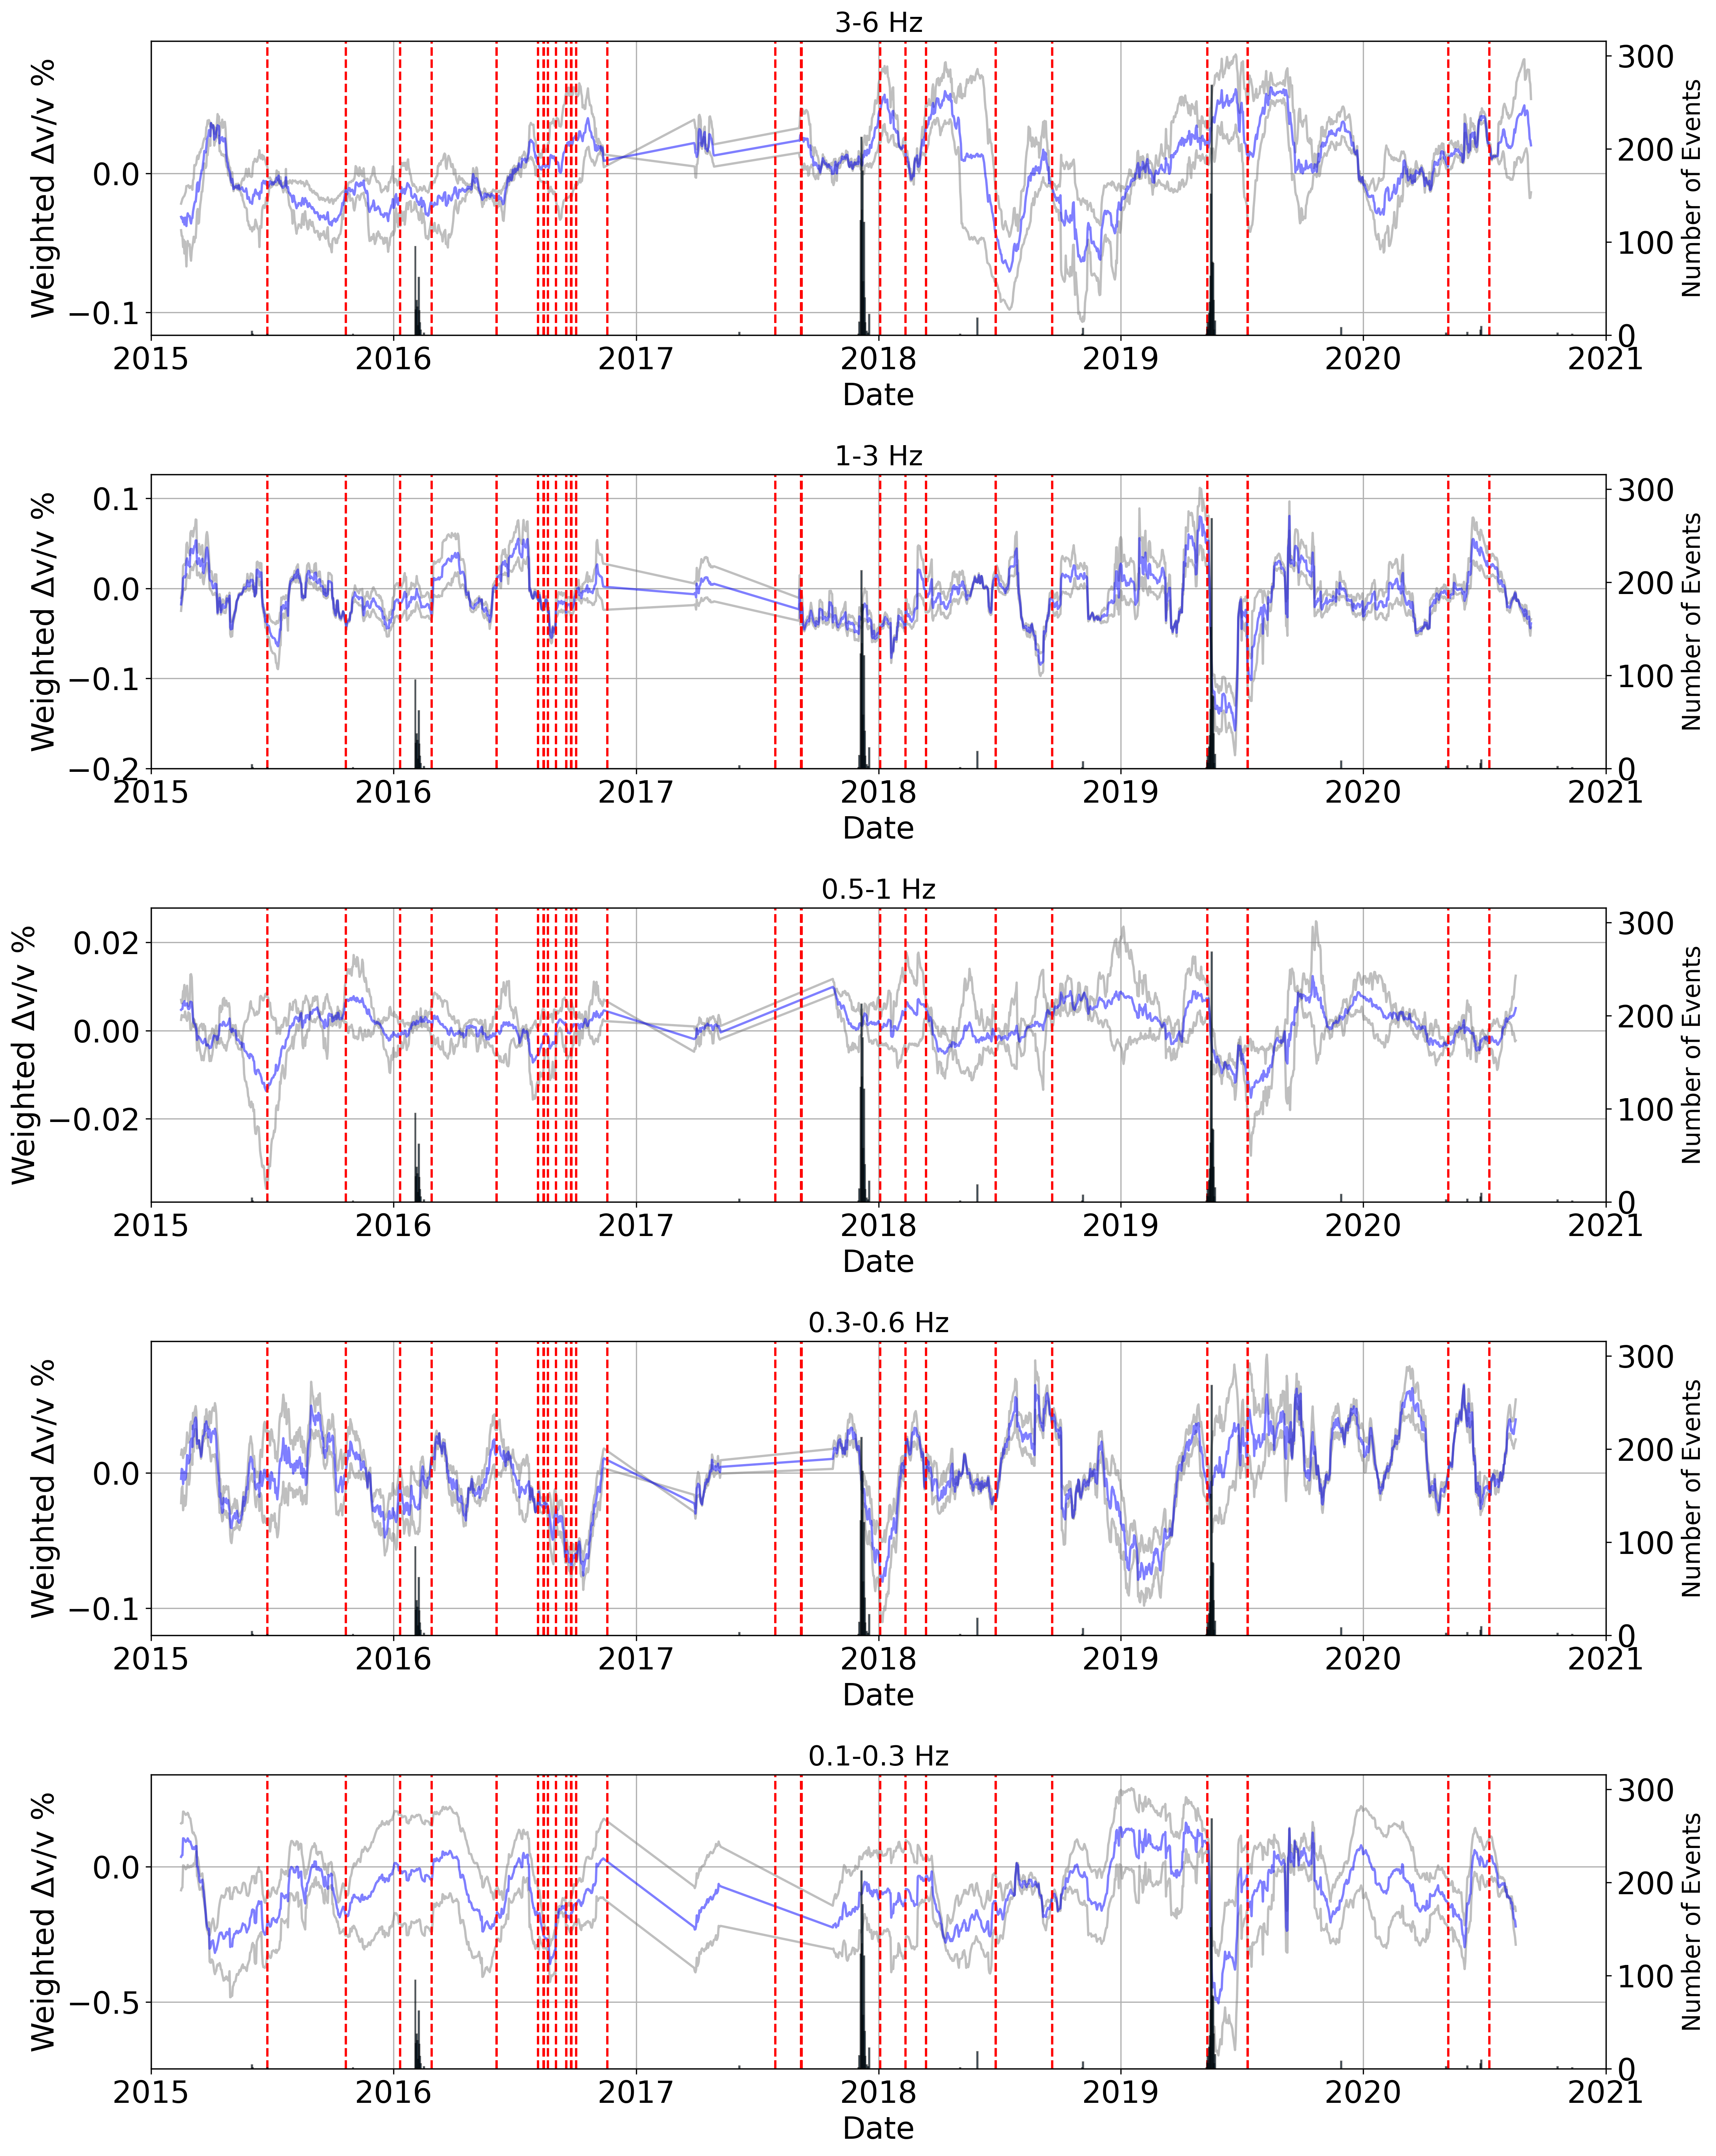

In [83]:
# --- MAIN SCRIPT: Create one figure with multiple subplots ---
fig, axes = plt.subplots(5, 1, figsize=(16, 20), dpi=300)

# 1) 3-6 Hz
process_and_plot(
    ax=axes[0],
    file_paths=['Data/HYS14_late_ZE_positive_3-6.csv','Data/HYS14_late_ZE_negative_3-6.csv'],
    multipliers=[-1, 1],
    subplot_title="3-6 Hz"
)

# 2) 1-3 Hz
process_and_plot(
    ax=axes[1],
    file_paths=['Data/HYS14_late_ZE_positive_1-3.csv','Data/HYS14_late_ZE_negative_1-3.csv'],
    multipliers=[1, 1],
    subplot_title="1-3 Hz"
)

# 3) 0.5-1 Hz
process_and_plot(
    ax=axes[2],
    file_paths=['Data/HYS14_late_ZE_positive_0.5-1.csv','Data/HYS14_late_ZE_negative_0.5-1.csv'],
    multipliers=[1, 1],
    subplot_title="0.5-1 Hz"
)

# 4) 0.3-0.6 Hz
process_and_plot(
    ax=axes[3],
    file_paths=['Data/HYS14_late_ZE_positive_0.3-0.6.csv','Data/HYS14_late_ZE_negative_0.3-0.6.csv'],
    multipliers=[-1, 1],
    subplot_title="0.3-0.6 Hz"
)

# 5) 0.1-0.3 Hz
process_and_plot(
    ax=axes[4],
    file_paths=['Data/HYS14_late_ZE_positive_0.1-0.3.csv','Data/HYS14_late_ZE_negative_0.1-0.3.csv'],
    multipliers=[-1, 1],
    subplot_title="0.1-0.3 Hz"
)

plt.tight_layout()
plt.show()


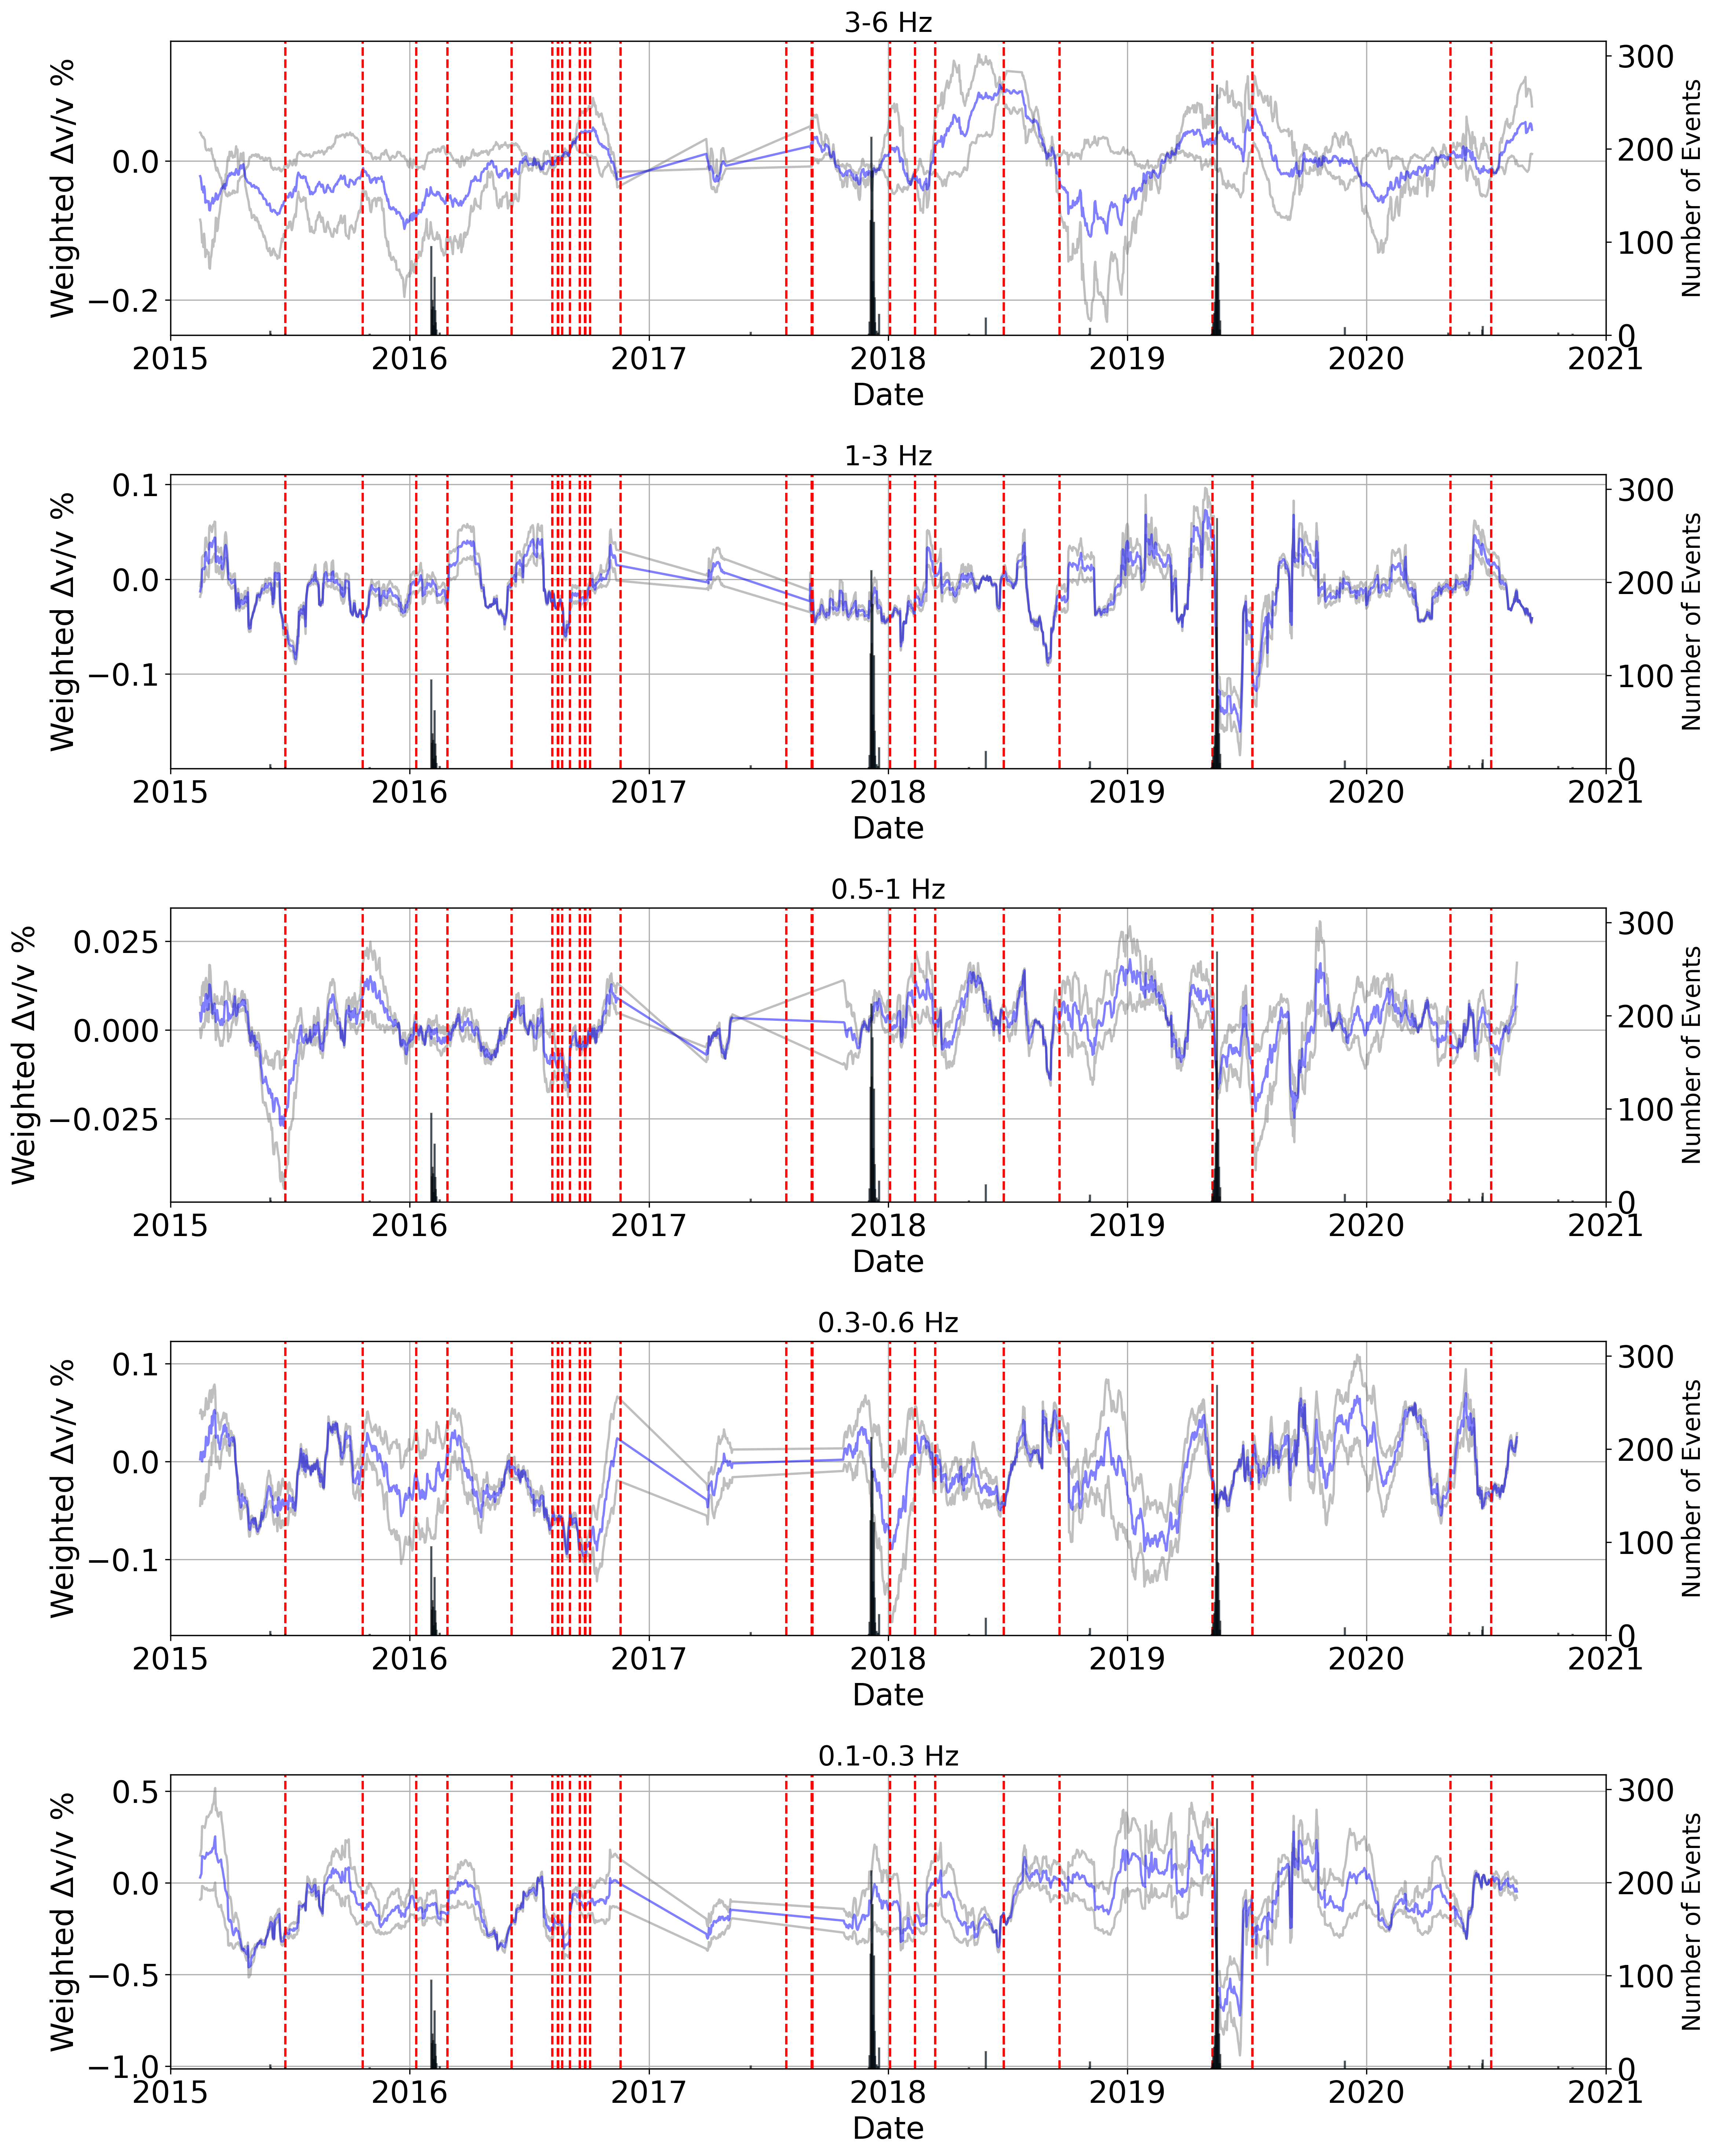

In [85]:
# --- MAIN SCRIPT: Create one figure with multiple subplots ---
fig, axes = plt.subplots(5, 1, figsize=(16, 20), dpi=300)

# 1) 3-6 Hz
process_and_plot(
    ax=axes[0],
    file_paths=['Data/HYS14_early_ZE_positive_3-6.csv','Data/HYS14_early_ZE_negative_3-6.csv'],
    multipliers=[1, 1],
    subplot_title="3-6 Hz"
)

# 2) 1-3 Hz
process_and_plot(
    ax=axes[1],
    file_paths=['Data/HYS14_early_ZE_positive_1-3.csv','Data/HYS14_early_ZE_negative_1-3.csv'],
    multipliers=[1, 1],
    subplot_title="1-3 Hz"
)

# 3) 0.5-1 Hz
process_and_plot(
    ax=axes[2],
    file_paths=['Data/HYS14_early_ZE_positive_0.5-1.csv','Data/HYS14_early_ZE_negative_0.5-1.csv'],
    multipliers=[-1, 1],
    subplot_title="0.5-1 Hz"
)

# 4) 0.3-0.6 Hz
process_and_plot(
    ax=axes[3],
    file_paths=['Data/HYS14_early_ZE_positive_0.3-0.6.csv','Data/HYS14_early_ZE_negative_0.3-0.6.csv'],
    multipliers=[-1, 1],
    subplot_title="0.3-0.6 Hz"
)

# 5) 0.1-0.3 Hz
process_and_plot(
    ax=axes[4],
    file_paths=['Data/HYS14_early_ZE_positive_0.1-0.3.csv','Data/HYS14_early_ZE_negative_0.1-0.3.csv'],
    multipliers=[1, 1],
    subplot_title="0.1-0.3 Hz"
)

plt.tight_layout()
plt.show()


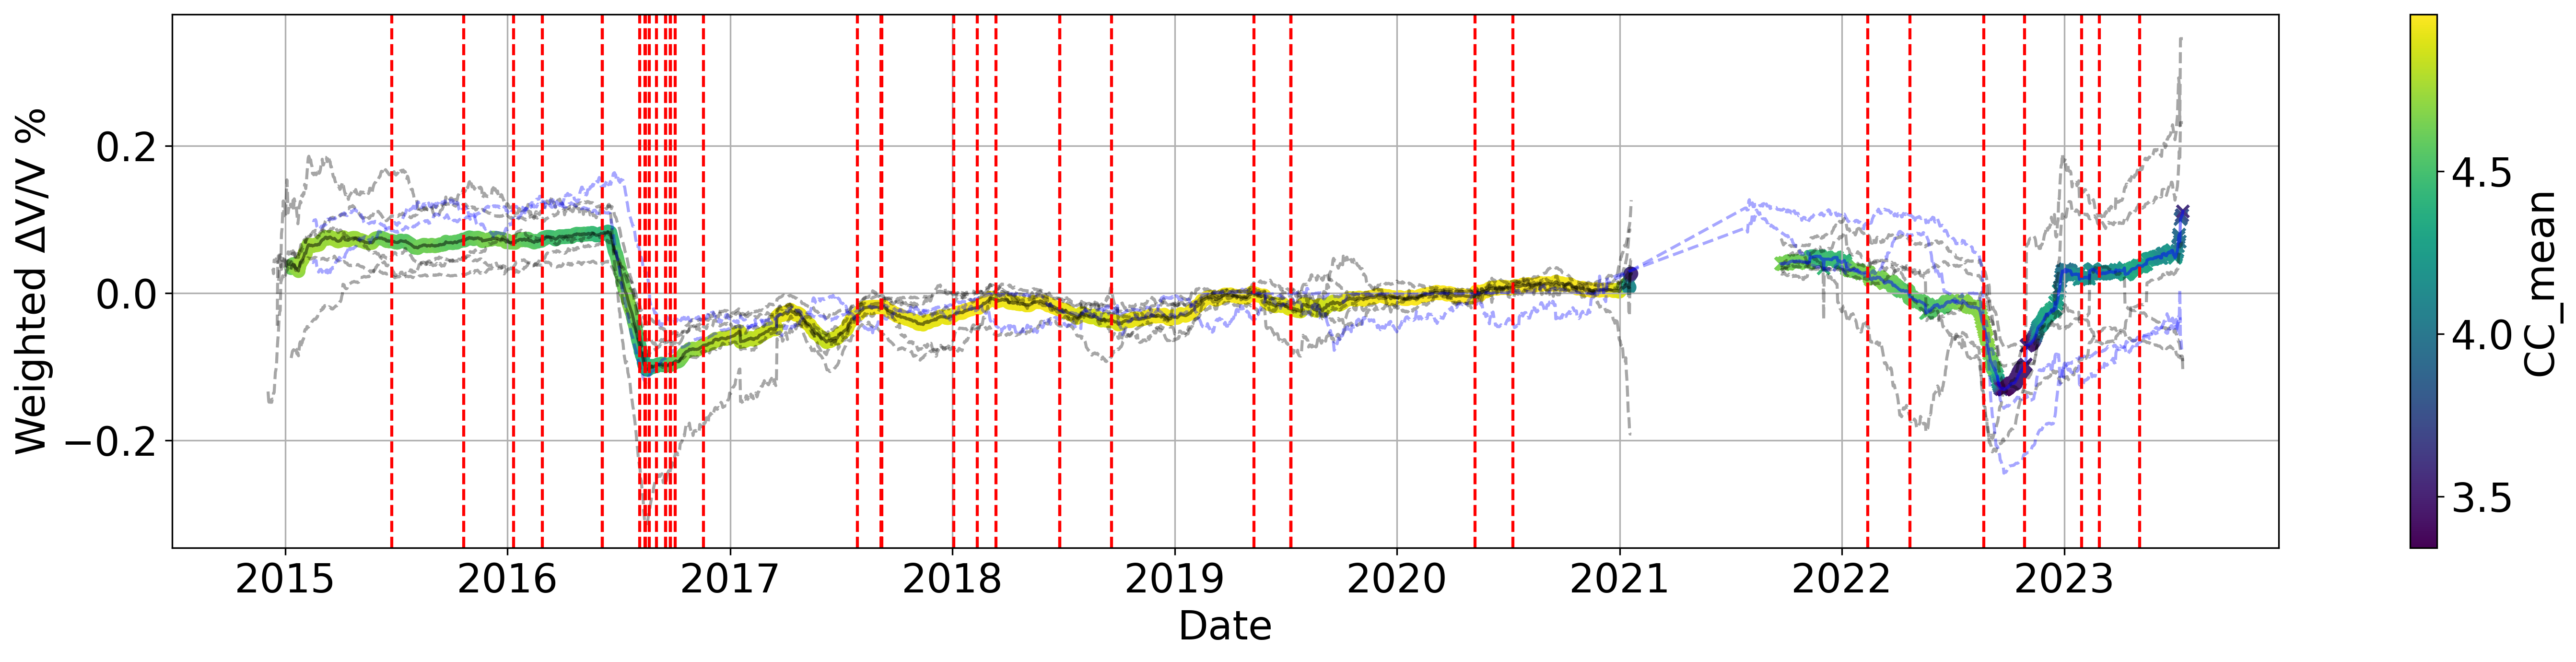

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Define the paths to your CSV files
file_paths_1 = [
    'Data/B1_60daystack_3p0to5p0 negativeZE 102svd7x.csv',
    'Data/B1_60daystack_3p0to5p0 positiveZE 210svd7x.csv',
    'Data/B1_60daystack_3p0to5p0 negativeZN 102svd7x.csv',
    'Data/B1_60daystack_3p0to5p0 positiveZN 210svd7x.csv',
    'Data/B1_60daystack_3p0to5p0 positiveNE 210svd7x.csv',
]

file_paths_2 = [
    'Data/HYSB1_addonNE_negative.csv',
    'Data/HYSB1_addonZE_positive.csv',
    'Data/HYSB1_addonZN_negative.csv',
    'Data/HYSB1_addonZN_positive.csv',
    'Data/HYSB1_addonNE_positive.csv',
]

file_paths_3 = [
    'Data/HYSB1_NE35n1_10.csv',
    'Data/HYSB1_ZE35p1_10.csv'
]

file_paths_4 = [
    'Data/B1_60daystack_3p0to5p0 negativeNE 102svd7x.csv',
]

# Predefined arrays with multipliers (-1 or +1)
multipliers_1 = [1, 1, 1, 1, 1,-1]
multipliers_2 = [1, 1, -1, 1, 1]
multipliers_3 = [1, 1]
multipliers_4 = [-1]

def process_files(file_paths, multipliers):
    dataframes = []
    for path, multiplier in zip(file_paths, multipliers):
        df = pd.read_csv(path)
        df['DVT'] *= multiplier  # Apply the multiplier to the DVT column
        dataframes.append(df)

    # Parse timestamps and set them as the index
    for df in dataframes:
        df['T'] = pd.to_datetime(df['T'])
        df.set_index('T', inplace=True)

    # Create a unified time index from the union of all timestamps in the dataframes
    unified_index = pd.to_datetime(sorted(set.union(*(set(df.index) for df in dataframes))))

    # Interpolate data for each dataframe to match the unified index
    interpolated_dfs = [df.reindex(unified_index).interpolate() for df in dataframes]

    # Calculate CC_mean using squared correlation coefficients for each time point
    CC_mean = sum(df['CCT']**2 for df in interpolated_dfs)

    # Calculate weighted Δu/u using squared CCT and DVT
    weighted_dvv = sum(df['CCT']**2 * df['DVT'] for df in interpolated_dfs) / CC_mean

    # Create a DataFrame for the weighted Δv/v time series
    weighted_dvv_df = pd.DataFrame(weighted_dvv, columns=['Weighted Δv/v'])
    weighted_dvv_df.index = weighted_dvv_df.index + pd.DateOffset(days=30)

    return interpolated_dfs, weighted_dvv_df, CC_mean

# Process all sets of files
interpolated_dfs_1, weighted_dvv_df_1, CC_mean_1 = process_files(file_paths_1, multipliers_1)
interpolated_dfs_2, weighted_dvv_df_2, CC_mean_2 = process_files(file_paths_2, multipliers_2)
interpolated_dfs_3, _, _ = process_files(file_paths_3, multipliers_3)

# Combine CC_mean for a common colorbar scale
combined_CC_mean = pd.concat([CC_mean_1, CC_mean_2])
norm = mcolors.Normalize(vmin=combined_CC_mean.min(), vmax=combined_CC_mean.max())
cmap = cm.viridis  # Can choose any available colormap

# Plotting section
plt.figure(figsize=(20, 5), dpi=300)

# Step 1: Plot each individual DVT time series in black without applying CC
for df in interpolated_dfs_1:
    df.index = df.index + pd.DateOffset(days=30)
    plt.plot(df.index, df['DVT'], color='black', alpha=0.35, linestyle='--', label='Individual Time Series (Set 1)')
for df in interpolated_dfs_2:
    df.index = df.index + pd.DateOffset(days=30)
    plt.plot(df.index, df['DVT'], color='black', alpha=0.35, linestyle='--', label='Individual Time Series (Set 2)')

# Step 2: Plot the weighted Δv/v time series from the first set of files with color-coded CC_mean
sc1 = plt.scatter(weighted_dvv_df_1.index, weighted_dvv_df_1['Weighted Δv/v'], c=CC_mean_1, cmap=cmap, norm=norm, label='Weighted Δv/v (Set 1)')
plt.plot(weighted_dvv_df_1.index, weighted_dvv_df_1['Weighted Δv/v'], 'k-', alpha=0.5)  # Line plot to connect markers

# Step 3: Plot the weighted Δv/v time series from the second set of files with color-coded CC_mean
sc2 = plt.scatter(weighted_dvv_df_2.index, weighted_dvv_df_2['Weighted Δv/v'], c=CC_mean_2, cmap=cmap, norm=norm, label='Weighted Δv/v (Set 2)', marker='x')
plt.plot(weighted_dvv_df_2.index, weighted_dvv_df_2['Weighted Δv/v'], 'b-', alpha=0.5)  # Line plot to connect markers

# Step 4: Plot each individual Δv/v time series from the third set of files in red without color-coding
for i, df in enumerate(interpolated_dfs_3):
    df.index = df.index + pd.DateOffset(days=30)
    if i == 0:
        df['DVT'] = df['DVT'] / 5  # Adjust the first file of the third set
    plt.plot(df.index, df['DVT'], color='blue', alpha=0.35, linestyle='--', label='Individual Time Series (Set 3)')

# Add a single colorbar for both sets
plt.colorbar(sc2, label='CC_mean')

# Plot labels and customization
plt.xlabel('Date', fontsize=20)
plt.ylabel('Weighted ΔV/V %', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.ylim([-0.105,0.085])

for dt in datetime_objects:
    plt.axvline(x=dt, color='red', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()
